<a href="https://colab.research.google.com/github/mingshey/python_mechanics/blob/main/Python%ED%95%B4%EC%84%9D%EC%97%AD%ED%95%99_014_%EC%B5%9C%EC%86%8C_%EC%9E%91%EC%9A%A9_%EC%9B%90%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analytical Mechanics with Python
# 파이썬으로 코딩하는 해석역학
## <Elective Tracks 2024 Summer Programme>

## Heron 원리 (최단 거리 원리)
* Hero of Alexandria, "Catoptrica"

<center><img src='https://drive.google.com/uc?export=download&id=1WtRBEYLhR2qE0VGQGjTRCdjkktMIxNTN' width="500" height ="" />
</center>



$$ s_1 = \sqrt{x^2+a^2} $$
$$ s_2 = \sqrt{(d-x)^2+b^2} $$

$ s = s_1 + s_2$가 최소인 경로는 $\dfrac{ds}{dx}=0, $ 즉

$$ \frac{ds}{dx} = \frac{x}{\sqrt{x^2+a^2}}+\frac{-(d-x)}{\sqrt{(d-x)^2+b^2}} = 0, $$

또는

$$ \frac{x}{\sqrt{x^2+a^2}}=\frac{d-x}{\sqrt{(d-x)^2+b^2}} $$

인 경로이다. 여기서

$$ \sin\theta_1 = \frac{x}{\sqrt{x^2 + a^2}} $$
$$ \sin\theta_2 = \frac{d-x}{\sqrt{(d-x)^2 + a^2}} $$

이므로 최단 거리 경로는

$$ \sin\theta_1 = \sin\theta_2, $$

또는

$$ \theta_1 = \theta_2 $$

인 경로이다. (반사 법칙)

In [ ]:
import sympy as sym
import matplotlib.pyplot as plt
import scipy.optimize as so
import numpy as np

In [ ]:
sym.init_printing()

In [ ]:
x, a, b, d = sym.symbols("x a b d")

In [ ]:
s1 = sym.sqrt(x**2 + a**2)
s2 = sym.sqrt((d-x)**2+b**2)
s = s1 + s2
s

   _________      _______________
  ╱  2    2      ╱  2          2 
╲╱  a  + x   + ╲╱  b  + (d - x)  

In [ ]:
dsdx = sym.diff(s, x)
dsdx

     x               -d + x      
──────────── + ──────────────────
   _________      _______________
  ╱  2    2      ╱  2          2 
╲╱  a  + x     ╲╱  b  + (d - x)  

In [ ]:
A = 1
B = .5
D = 1

In [ ]:
dsdx.subs({a:A, b:B, d:D})

     x               x - 1        
─────────── + ────────────────────
   ________      _________________
  ╱  2          ╱        2        
╲╱  x  + 1    ╲╱  (1 - x)  + 0.25 

In [ ]:
dsdxf = sym.lambdify([x], dsdx.subs({a:A, b:B, d:D}))

In [ ]:
X1, X2 = so.fsolve(dsdxf, [0, D])

In [ ]:
X1, X2

(0.6666666666666728, 0.6666666666668687)

In [ ]:
pA = np.array([0, A])
pB = np.array([D, B])
pX = np.array([X1, 0])
path1 = np.array([pA, pX, pB])

In [ ]:
path1

array([[0.        , 1.        ],
       [0.66666667, 0.        ],
       [1.        , 0.5       ]])

In [ ]:
path1.T

array([[0.        , 0.66666667, 1.        ],
       [1.        , 0.        , 0.5       ]])

In [ ]:
pxs1, pys1 = path1.T

Text(0.6666666666666728, 0.0, 'X')

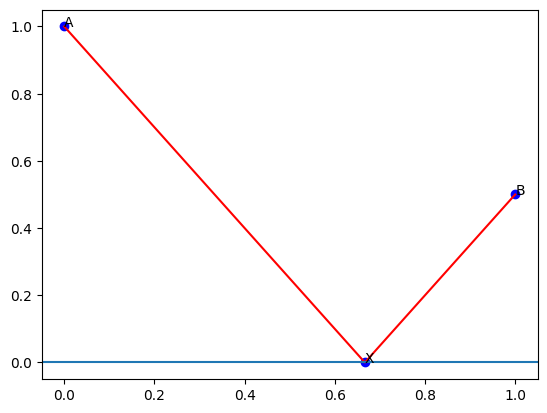

In [ ]:
plt.scatter(pxs1, pys1, c='b')
plt.plot(pxs1, pys1, c='r')
plt.axhline(0)
plt.text(pA[0], pA[1], "A")
plt.text(pB[0], pB[1], "B")
plt.text(pX[0], pX[1], "X")

In [ ]:
sine1 = X1 / np.sqrt(X1**2 + A**2)
sine2 = (D - X1) / np.sqrt((D - X1)**2 + B**2)
sine1 , sine2

(0.5547001962252327, 0.554700196225222)

In [ ]:
sxf = sym.lambdify([x], s.subs({a:A, b:B, d:D}))

Text(0.6666666666666728, 1.8027756377319946, 'X')

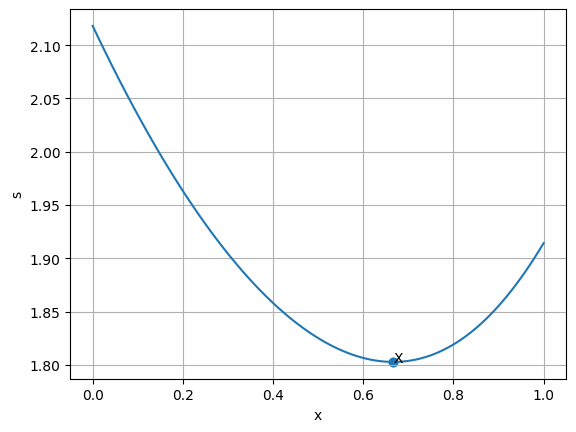

In [ ]:
xs = np.linspace(0, D, 100)
ss = sxf(xs)

plt.grid()
plt.plot(xs, ss)
plt.xlabel("x")
plt.ylabel("s")
plt.scatter([X1, X2], [sxf(X1), sxf(X2)])
plt.text(X1, sxf(X1), "X")

## Fermat 원리 (최소 시간 원리)

<center><img src='https://drive.google.com/uc?export=download&id=1tkAv9lUPSwiHOqifANX0qt7z-cqZ3Mxl' width="500" height ="" />
</center>


$$t_1 = \frac{1}{v_1}\sqrt{x^2+a^2}$$
$$t_2 = \frac{1}{v_2}\sqrt{(d-x)^2+b^2}$$
$t = t_1 + t_2$가 최소인 경로는 $\dfrac{dt}{dx}=0,$ 즉
$$\frac{dt}{dx} = \frac{1}{v_1}\frac{x}{\sqrt{x^2+a^2}}+\frac{1}{v_2}\frac{-(d-x)}{\sqrt{(d-x)^2+b^2}} = 0,$$또는
$$\frac{1}{v_1}\frac{x}{\sqrt{x^2+a^2}}=\frac{1}{v_2}\frac{d-x}{\sqrt{(d-x)^2+b^2}}$$인 경로이다.
즉,
$$\frac{1}{v_1}\sin\theta_1 = \frac{1}{v_2}\sin\theta_2$$ 또는

$$\frac{\sin\theta_2}{\sin\theta_1} = \frac{v_2}{v_1}$$인 경로이다. (굴절 법칙, Snell's Law)

In [ ]:
v1, v2 = sym.symbols(r"v_1 v_2")
v1, v2

(v₁, v₂)

In [ ]:
t1 = sym.sqrt(x**2 + a**2) / v1
t2 = sym.sqrt((d-x)**2+b**2) / v2
t = t1 + t2
t

   _______________      _________
  ╱  2          2      ╱  2    2 
╲╱  b  + (d - x)     ╲╱  a  + x  
────────────────── + ────────────
        v₂                v₁     

In [ ]:
dtdx = sym.diff(t, x)
dtdx

       -d + x                  x       
───────────────────── + ───────────────
      _______________         _________
     ╱  2          2         ╱  2    2 
v₂⋅╲╱  b  + (d - x)     v₁⋅╲╱  a  + x  

In [ ]:
A = 1
B = .5
D = 1
V1, V2 = 1, 0.8

In [ ]:
dtdx.subs({a:A, b:B, d:D, v1:V1, v2:V2})

     x            1.25⋅(x - 1)    
─────────── + ────────────────────
   ________      _________________
  ╱  2          ╱        2        
╲╱  x  + 1    ╲╱  (1 - x)  + 0.25 

In [ ]:
dtdxf = sym.lambdify([x], dtdx.subs({a:A, b:B, d:D, v1:V1, v2:V2}))

In [ ]:
EX1, EX2 = so.fsolve(dtdxf,[0,D])
EX1, EX2

(0.7319363125737993, 0.7319363125737823)

In [ ]:
qA = np.array([0, A])
qB = np.array([D, -B])
qX = np.array([EX1, 0])
path = np.array([qA, qX, qB])

In [ ]:
qxs, qys = path.T

Text(0.7319363125737993, 0.0, 'C')

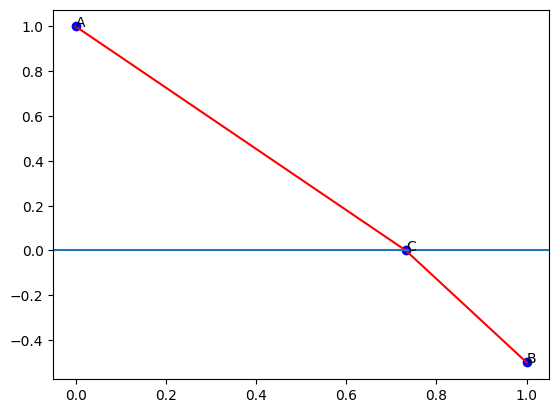

In [ ]:
plt.scatter(qxs, qys, c='b')
plt.plot(qxs, qys, c='r')
plt.axhline(0)
plt.text(qA[0], qA[1], "A")
plt.text(qB[0], qB[1], "B")
plt.text(qX[0], qX[1], "C")

In [ ]:
sine1 = EX1 / np.sqrt(EX1**2 + A**2)
sine2 = (D - EX1) / np.sqrt((D - EX1)**2 + B**2)
sine2 / sine1, V2 / V1

(0.7999999999999817, 0.8)

In [ ]:
t

   _______________      _________
  ╱  2          2      ╱  2    2 
╲╱  b  + (d - x)     ╲╱  a  + x  
────────────────── + ────────────
        v₂                v₁     

In [ ]:
txf = sym.lambdify([x], t.subs({a:A, b:B, d:D, v1:V1, v2:V2}))

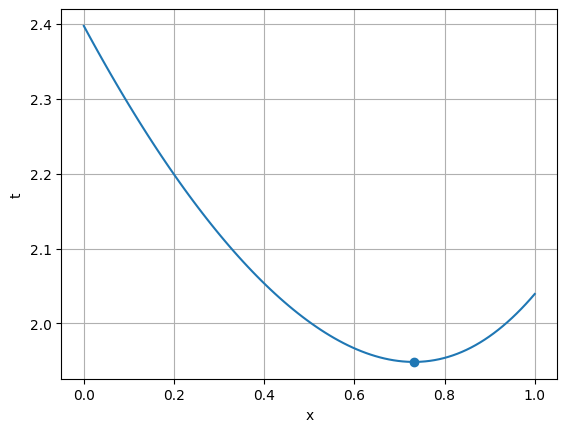

In [ ]:
ts = txf(xs)

plt.grid()
plt.plot(xs, ts)
plt.xlabel("x")
plt.ylabel("t")
plt.scatter(EX1, txf(EX1))

## 최소 작용 원리

해밀턴(Hamilton, William Rowan)의 최소 작용 원리(least action principle)



* **작용**:

$$ J = \int_{t_1}^{t_2} L dt $$

* **라그랑지안**:

$$ L = T - V $$

($ T $: 운동 에너지, $ V $: 퍼텐셜 에너지)

* **최소 작용 원리**:

물체의 운동은 작용이 최소(극소)가 되는 경로, 즉
$$ \delta J = 0. $$
인 경로를 따른다.



<center><img src='https://drive.google.com/uc?export=download&id=1jkU_OkO1PkSYRa3wo7KM2kMb5DrYnvgs' width="400" height ="" /> <img src='https://drive.google.com/uc?export=download&id=1JEnkSpgIlGZgHFkszr27dQasr2e4ujIN' width="400" height ="" />
</center>


* 예제:

In [ ]:
ts = np.linspace(0, 3, 200) # t
v0 = 20 # [m/s]
g = 9.8 # [m/s^2]
# y(t) : 실제 경로
ys = v0 * ts - (1/2) * g * ts**2   # y(t); 연직 위로 던져 올린 물체의 운동

# η(t) :임의의 연속이고 미분 가능한 함수 (시작점과 끝점에서 0일 것)
eta = np.sin(ts / 3 * np.pi) + np.sin(ts**2 * np.pi)/3 * ts

# α : 변분 매개변수
alphas = np.linspace(-5, 5, 51) # α (variation parameter)

# y(α, t) : 변경된 경로
var_ys = [ys + a * eta for a in alphas]

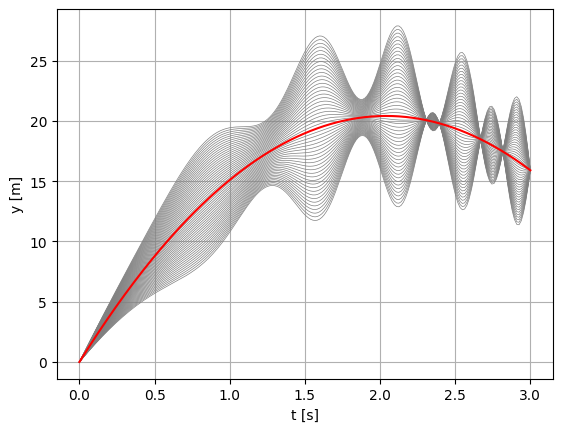

In [ ]:
plt.grid()
plt.xlabel("t [s]")
plt.ylabel("y [m]")
for vy in var_ys:
  plt.plot(ts, vy, c='gray', lw=.5)
plt.plot(ts, ys, c='r', label="true path")


In [ ]:
dt = np.diff(ts)
dydts = [np.diff(vy)/dt for vy in var_ys]

In [ ]:
PEs = [9.8 * y for y in var_ys]
KEs = [0.5 * v**2 for v in dydts]
Ls = [KEs[k] - PEs[k][:-1] for k in range(len(KEs))]
Js = [(L*dt).sum() for L in Ls]

In [ ]:
zero = np.where(alphas==0.0)[0][0]
J0 = Js[zero]

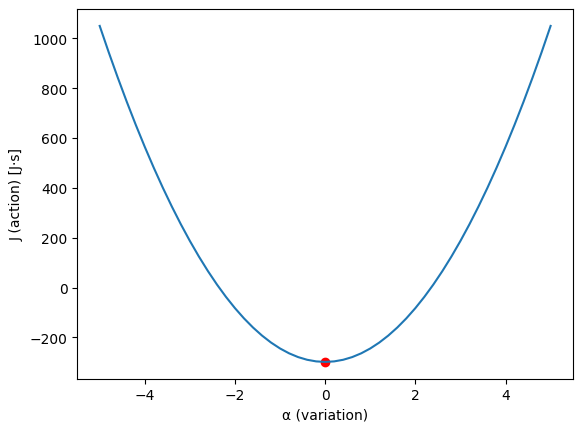

In [ ]:
plt.xlabel("α (variation)")
plt.ylabel("J (action) [J·s]")
plt.plot(alphas, Js)
plt.scatter([0],[J0], c='r')